# Project Title: Bedah Statistik Deskriptif Penyakit Leukemia

## Goal

make a full profile from leukemia data. This data contain clinics caractheristic, life style, environment, and leukemia status positve or negative.

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

### Load data

In [3]:
df = pd.read_csv('../../data/biased_leukemia_dataset.csv')

In [4]:
df.head()

,Patient_ID,Age,Gender,Country,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,Genetic_Mutation,Family_History,Smoking_Status,Alcohol_Consumption,Radiation_Exposure,Infection_History,BMI,Chronic_Illness,Immune_Disorders,Ethnicity,Socioeconomic_Status,Urban_Rural,Leukemia_Status
0,1,52,Male,China,2698,5.36,262493,12.2,72,Yes,No,Yes,No,No,No,24.0,No,No,Ethnic_Group_B,Low,Rural,Negative
1,2,15,Female,China,4857,4.81,277877,11.9,97,Yes,No,No,No,No,No,28.7,No,No,Ethnic_Group_A,Low,Urban,Positive
2,3,72,Male,France,9614,5.17,319600,13.4,94,No,Yes,No,Yes,No,No,27.7,No,No,Ethnic_Group_B,Low,Urban,Negative
3,4,61,Male,Brazil,6278,5.41,215200,11.6,50,No,No,Yes,No,No,No,31.6,No,No,Ethnic_Group_A,Medium,Rural,Negative
4,5,21,Male,Brazil,8342,4.78,309169,14.3,28,No,No,Yes,No,No,No,22.3,No,No,Ethnic_Group_B,Low,Rural,Negative


### Data Cleaning

In [5]:
# check missing values
display(df.isnull().sum())

Patient_ID              0
Age                     0
Gender                  0
Country                 0
WBC_Count               0
RBC_Count               0
Platelet_Count          0
Hemoglobin_Level        0
Bone_Marrow_Blasts      0
Genetic_Mutation        0
Family_History          0
Smoking_Status          0
Alcohol_Consumption     0
Radiation_Exposure      0
Infection_History       0
BMI                     0
Chronic_Illness         0
Immune_Disorders        0
Ethnicity               0
Socioeconomic_Status    0
Urban_Rural             0
Leukemia_Status         0
dtype: int64

There no missing values

In [6]:
# check duplicated data
display(f"Jumlah duplicate data: {df.duplicated().sum()}")

'Jumlah duplicate data: 0'

In [30]:
# search negatif values in WBC_Count
negative_values = df[df['WBC_Count'] < 0]['WBC_Count']
count_negative_values = df[df['WBC_Count'] < 0]['WBC_Count'].count()
# Tampilkan nilai negatif jika ada
if not negative_values.empty:
    print(f"Count negative value in column 'WBC_Count': {count_negative_values}")
    print(f"Nilai negatif dalam kolom 'WBC_Count': \n{negative_values}")
else:
    print("Tidak ada nilai negatif dalam kolom 'WBC_Count'")

Count negative value in column 'WBC_Count': 23
Nilai negatif dalam kolom 'WBC_Count': 
7579      -492
16642    -1602
23335      -96
27593     -453
28880      -83
29429     -242
31428    -1415
35422     -313
65493      -96
73116     -959
76635     -649
78880     -827
88541     -306
97653      -10
100352     -58
105489    -605
106353    -314
116142     -46
117864    -672
118977   -1484
119275     -74
123617    -340
133167     -22
Name: WBC_Count, dtype: int64


There are 23 data that contain negative value from `WBC_Count`.

### Descriptive Analysis Statistics

#### Descriptive statistic numerical columns

In [7]:
# describe data
df.describe()

,Patient_ID,Age,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,BMI
count,143194.00000,143194.000000,143194.000000,143194.000000,143194.000000,143194.000000,143194.000000,143194.000000
mean,71597.50000,44.945200,7001.289879,4.998193,249933.012137,13.498334,49.547984,24.990679
std,41336.69156,25.737805,2007.444410,0.500298,49842.308243,1.996714,28.837607,4.999786
min,1.00000,1.000000,-1602.000000,2.940000,46069.000000,4.700000,0.000000,2.800000
25%,35799.25000,23.000000,5644.250000,4.660000,216372.000000,12.100000,25.000000,21.600000
50%,71597.50000,45.000000,7007.000000,5.000000,250248.500000,13.500000,50.000000,25.000000
75%,107395.75000,67.000000,8352.000000,5.340000,283603.500000,14.800000,75.000000,28.300000
max,143194.00000,89.000000,15586.000000,7.150000,460325.000000,22.200000,99.000000,49.100000


Insight:

---

- No missing value in all column.

- `mean` patient age : 49 year old.

- `std` (Standard Deviation) patient age: 25.7 year old.

- `min` patient age: 1 year old.

- `Q1 (25%)` age patient under or equal with **Q1** is :23 year old.

- `Q2 (50%) - Median` half patient age under or equal with median value (**Q2**) is: 45 year old.

- `Q3 75%)` age patient under or equal **Q3** is : 67 year old.

- `max` patient age is: 89 year old

So, according to my insight, the average age of patients diagnosed with leukemia is mostly 49 years old, and the median age of people who contract leukemia is 25.7 years old.

#### Descriptive statistic categorical columns

In [8]:
#  Identifikasi kolom kategorikal
column_categorical = []
for column in df.columns:
    dtype = df[column].dtype
    if pd.api.types.is_object_dtype(dtype) or isinstance(dtype, pd.CategoricalDtype):
        column_categorical.append(column)

#  Identifikasi kolom numerical
numerical_column = []
for column in df.columns:
    dtype = df[column].dtype
    if pd.api.types.is_numeric_dtype(dtype) or isinstance(dtype, pd.CategoricalDtype):
        numerical_column.append(column)

# Hitung nilai unik untuk setiap kolom kategorikal
frequency = {}
percentage = {}
for column in column_categorical:
    frequency[column] = df[column].value_counts()
    percentage[column] = df[column].value_counts(normalize=True) * 100

In [ ]:
# print the result
for column in column_categorical:
    freq = frequency[column]
    pct = percentage[column]
    
    formatted_freq = ""
    for index, value in freq.items():
        formatted_freq += f"{index} : {value}<br>"

    formatted_pct = ""
    for index, value in pct.items():
        formatted_pct += f"{index} : {value:.1f}%<br>" # Format setiap nilai di sini

    display(HTML(f"Kolom: {column}"))
    display(HTML(f"Frequency:<br>{formatted_freq}"))
    display(HTML(f"Percentage:<br>{formatted_pct}"))
    print("-" * 50)

kolom kategorikal: ['Gender', 'Country', 'Genetic_Mutation', 'Family_History', 'Smoking_Status', 'Alcohol_Consumption', 'Radiation_Exposure', 'Infection_History', 'Chronic_Illness', 'Immune_Disorders', 'Ethnicity', 'Socioeconomic_Status', 'Urban_Rural', 'Leukemia_Status'] 



--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


Insight

---
- Gender:  The dataset is skewed towards males, comprising 59.9% of the population, while females make up 40.1%.

- Country: The data originates predominantly from India (16.1%) and the USA (15.9%), followed by Brazil, Russia, and China, each contributing approximately 10.6%.  Other countries represent a significantly smaller portion (around 2%).

- Genetic Mutation:  A large majority (80.1%) of the individuals in the dataset do not have a recorded genetic mutation, while 19.9% do.

- Family History:  Nearly 70% of the individuals have no family history of the condition being studied, while approximately 30% do.

- Smoking Status: Similar to gender distribution, the dataset shows a higher proportion of non-smokers (59.9%) compared to smokers (40.1%).

- Alcohol Consumption:  70% of the individuals report no alcohol consumption, while 30% do.

- Radiation Exposure:  Radiation exposure is relatively low, with only 10.1% reporting exposure, and 89.9% reporting no exposure.

- Infection History:  A quarter (25%) of the individuals have a history of infections, while the majority (75%) do not.

- Chronic Illness:  34.9% of the individuals have a chronic illness, while 65.1% do not.

- Immune Disorders:  14.9% of the individuals have immune disorders, compared to 85.1% who do not.

- Ethnicity:  Ethnic Group A makes up the largest portion of the dataset (50.2%), followed by Ethnic Group B (29.9%) and Ethnic Group C (19.9%).

- Socioeconomic Status:  The dataset is comprised of 49.8% individuals with low socioeconomic status, 40.2% with medium status, and 10% with high status.

- Urban/Rural:  The data is predominantly from urban areas (70.1%), with only 29.9% from rural areas.

- Leukemia Status: The vast majority (85.1%) of the individuals tested negative for leukemia, while 14.9% tested positive.

### Visualizations

Make histplot, barchart, boxplot.

#### Histogram Chart

Histogram chart distribution from numerical columns

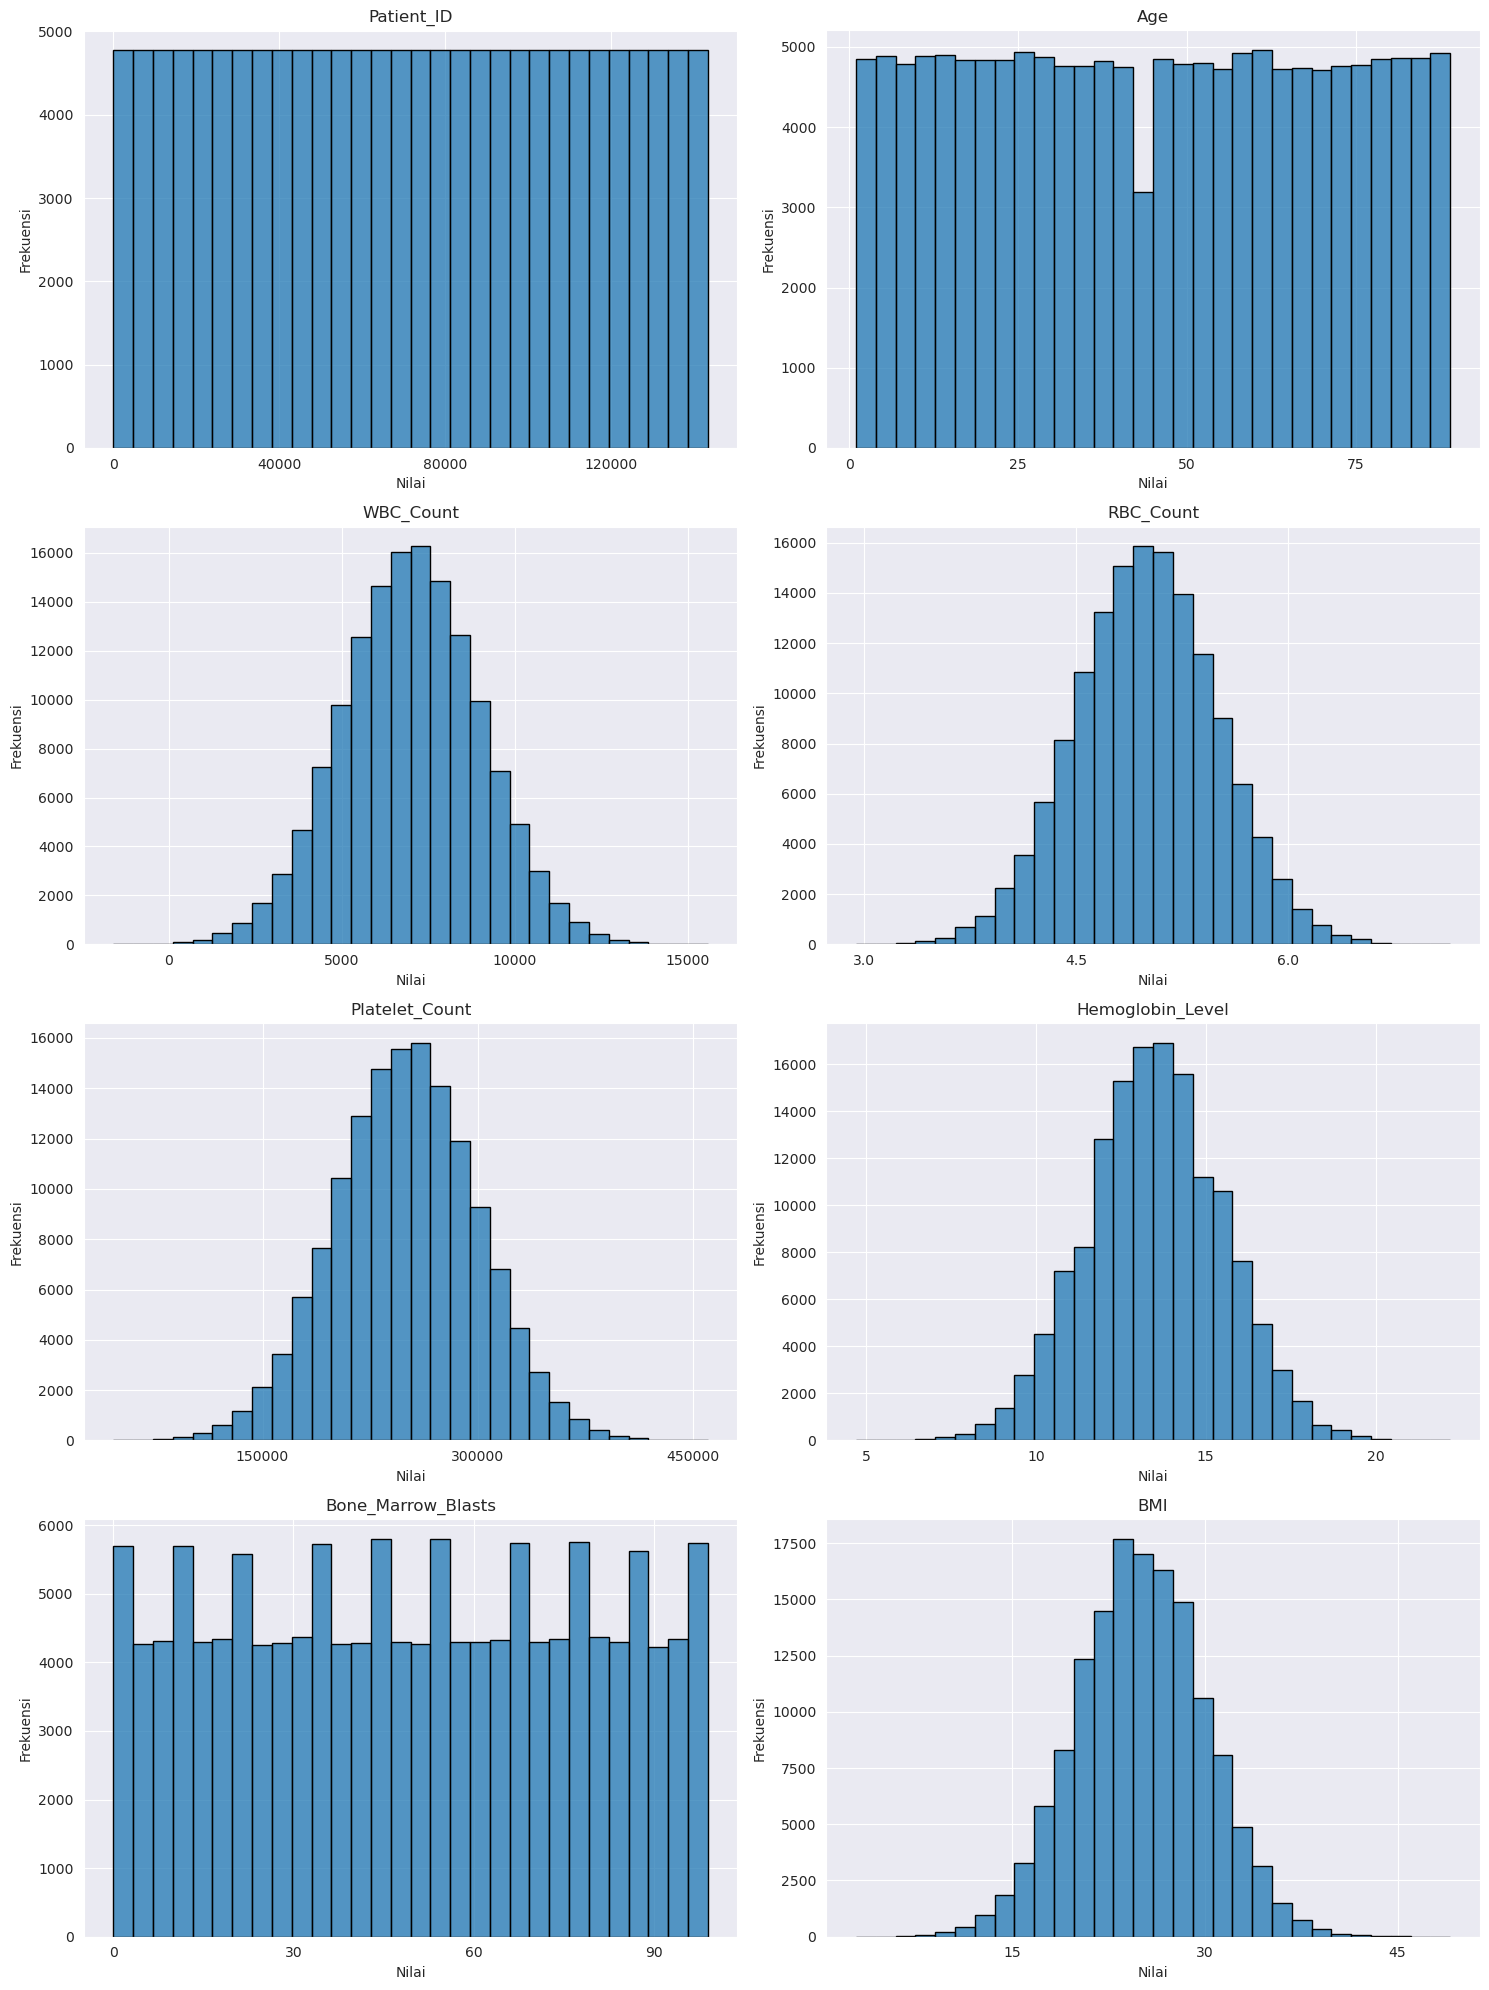

In [13]:
# Menentukan jumlah baris dan kolom plot
n_plots = len(numerical_column)
n_cols = 2 
n_rows = (n_plots + n_cols - 1) // n_cols 


# Membuat subplot dan flatten axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Iterasi dan buat histogram
for i, column in enumerate(numerical_column):
    ax = axes[i]
    sns.histplot(df[column], bins=30, edgecolor='black', ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Nilai')
    ax.set_ylabel('Frekuensi')
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))  # Sekarang aman

# Menyembunyikan subplot kosong
for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insight**

---

- Patient_ID:
    The distribution is very flat, almost uniform. This is natural, Patient_ID is just a patient sequence number, no special distribution pattern is expected. In essence, these patient IDs are random, with no particular bias or tendency.

- 


#### 